## **Temporal Median Filtering**

Temporal median filtering is a method used to reduce noise in a sequence of images or frames in a video. It works by taking a series of pixel values for a specific location in consecutive frames over time and finding the median value. This median value is then assigned to the corresponding pixel in a new frame.

The intensity of the pixel is calculated through the function V(x, y, t), where _t_ is the time dimension, and _x_ and _y_ are the spatial variables of pixel location. 

$$
B(x, y, t) = \frac{1}{N} \sum_{i=1}^n V(x, y, t-i)
$$

For example, V(1, 2, 3) represents the intensity of the pixel at location (1, 2) in the image at time t = 3 in the video sequence.

$$
B(x, y, t) = V(x, y, t-i)
$$

- Using 25 frames for training, it's possible to obtain 25 background estimates. Applying the calculation, it'll result in the background model. With each new input image or frame, the algorithm compares each pixel with the median value of the created model. If the pixel value in the new image is significantly different from the median, it may be considered part of the foreground or a moving object. **This process helps identify changes relative to the learned background, enabling the detection of objects or motion in the scene**.


In this Jupyter notebook, the implementation of this technique follows these steps:

**1.** Initialization;

**2.** Video Writer Configuration;

**3.** Frame Sampling;

**4.** Background Model Calculation;

**5.** Main Loop;

**6.** Release Resources.

**Step 1 -** Initialization:

- Import the necessary libraries (numpy and cv2);
- Define the video source (VIDEO_SOURCE) and the output video file (VIDEO_OUT);
- Open the video capture using OpenCV (cv2.VideoCapture);
- Read the first frame from the video.

In [18]:
import cv2
import numpy as np

In [19]:
VIDEO_SOURCE = 'Cars.mp4' # video path
VIDEO_OUT = 'filtragem_mediana_temporal.avi' # resulted video

In [20]:
# Reading the video
cap = cv2.VideoCapture(VIDEO_SOURCE)
hasFrame, frame = cap.read() 
print(hasFrame, frame.shape) 

# check if there are frames 
# video with 720x1280 pixels and 3 chanels

True (720, 1280, 3)


**Step 2 -** Video Writer Configuration:

- Configure the video writer using the XVID codec and the frame dimensions from the first frame;
- Print some information about the video, such as the frame count and random frame indices.

In [21]:
fourcc = cv2.VideoWriter_fourcc(*'XVID')
writer = cv2.VideoWriter(VIDEO_OUT, fourcc, 25, (frame.shape[1], frame.shape[0]), False)

In [22]:
# Total frames of input video
print(cap.get(cv2.CAP_PROP_FRAME_COUNT))

3000.0


> There are 3000 frames/images in this video

> Now, it'll be selected 25 random frames from the video

**Step 3 -** Frame Sampling:

- Generate random frame indices (framesIds) for frame sampling;
- Read frames corresponding to the sampled indices and store them in a list (frames).

In [6]:
# Select 25 random numbers following an uniform distribution
#print(np.random.uniform(size=25))

In [23]:
# Get the random frames
framesIds = cap.get(cv2.CAP_PROP_FRAME_COUNT) * np.random.uniform(size=25)
print(framesIds)

[ 920.79676104 1902.09046042  821.37145949  148.20466002 1481.19846652
 1250.09234274  958.50915691  931.11235721  506.88153637 2433.38468525
  504.85200272 1013.82768121  557.44772329 1760.10048493 2309.60125464
  413.89738165 1383.03280415 2321.34897816 1309.62850024  862.54560136
 1193.58727651  835.68683392 2973.73426118 1609.19339061 1786.49118902]


In [8]:
# Acess a specific frame (in this case 920, the first random frame)
cap.set(cv2.CAP_PROP_POS_FRAMES, 920)
hasFrame, frame = cap.read()
cv2.imshow('Test', frame)
cv2.waitKey(0)

-1

**Step 4 -** Background Model Calculation:

- Calculate the median frame from the sampled frames using np.median function;
- Save the median frame as an image (model_median_frame.jpg).
- Convert the median frame to grayscale.

In [24]:
# Create a matrix for the 25 selected frames
frames = []
for fid in framesIds:
    cap.set(cv2.CAP_PROP_POS_FRAMES, fid) # acess the specific frame
    hasFrame, frame = cap.read()
    frames.append(frame)

In [25]:
# Convert the list to array
print(np.asarray(frames).shape)
#print(frames[0]) # pixels values
#print(frames[1]) # pixels values

(25, 720, 1280, 3)


> 25 frames

> dimension: 720x1280

> 3 chanels

In [11]:
# 25 frames that will be used to generate the background model
for frame in frames:
    cv2.imshow('Frame', frame)
    cv2.waitKey(0)

In [26]:
print(np.median(frame[0]))
# return the median pixel from a specific frame

150.0


In [27]:
# Get the median of the 25 frames
medianFrame = np.median(frames, axis=0).astype(dtype=np.uint8) # set axis to specify line by line and dtype to specify int values
#print(medianFrame)
#cv2.imshow('Median frame', medianFrame)
#cv2.waitKey(0)

In [28]:
# Create the image for the model median frame
cv2.imwrite('model_median_frame.jpg', medianFrame)

True

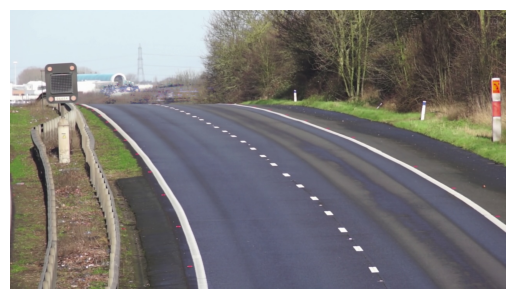

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load an image
image_path = "images/model_median_frame.jpg"  
img = mpimg.imread(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

In [29]:
# Create the output video:

cap.set(cv2.CAP_PROP_POS_FRAMES, 0) # reseta fluxo do video no primeiro frame
grayMedianFrame = cv2.cvtColor(medianFrame, cv2.COLOR_BGR2GRAY) # grayscale
#cv2.imshow('Gray', grayMedianFrame)
#cv2.waitKey(0)

In [ ]:
# Loop in all the video's frame
#while (True):
#    hasFrame, frame = cap.read()
#
#    if not hasFrame:
#        print('Error')
#        break
#
#    cv2.imshow('frame', frame)
#
#    if cv2.waitKey(1) & 0xFF == ord('q'):
#        break
#
#cap.release() 

**Step 5 -** Main Loop:

- Set the video capture back to the beginning;
- Convert the median frame to grayscale;
- Loop through each frame in the video;
- Convert the current frame to grayscale;
- Calculate the absolute difference between the current frame and the median frame (dframe);
- Apply a threshold to the difference frame using otsu's method;
- Display the resulting frame and write it to the output video file;
- Check for the 'q' key press to exit the loop;
- _Release Resources_: release the video writer and video capture resources.

In [ ]:
while (True):
    hasFrame, frame = cap.read()

    if not hasFrame:
        print('Error')
        break

    frameGray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Absolute difference between frames
    dframe = cv2.absdiff(frameGray, grayMedianFrame)
    
    # Create a binary image
    #th, dframe = cv2.threshold(dframe, 70, 255, cv2.THRESH_BINARY) # threshold value can be defined 
    th, dframe = cv2.threshold(dframe, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU) # OTSU find the best value for threshold for each frame 
    print(th)

    #cv2.imshow('frame', dframe)
    writer.write(dframe) 

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

writer.release()
cap.release()
cv2.destroyAllWindows()

## **Results:**

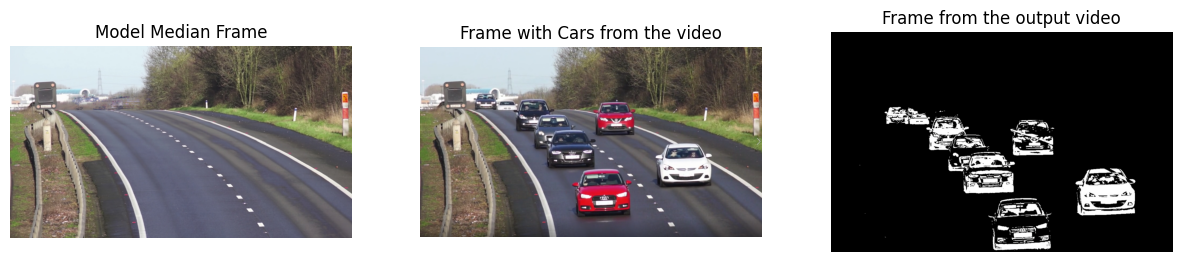

In [8]:
# Load the images 
img_one = mpimg.imread(image_path)
img_two = mpimg.imread("images/cars-video.png")
final_img = mpimg.imread("images/output-cars-video.png")

# Set the figure size
fig = plt.figure(figsize=(15, 5))

# Display the images side by side
plt.subplot(1, 3, 1)
plt.imshow(img_one)
plt.title('Model Median Frame')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_two)
plt.title('Frame with Cars from the video')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(final_img)
plt.title('Frame from the output video')
plt.axis('off')

plt.show()

_Some important considerations:_

- It is not very efficient;
- Precision depends on the speed of movement in the scene (faster movements may require higher thresholds);
- Background object movements may be considered as permanent foreground objects;
- It is not suitable for handling gradual changes in lighting in the scene;
- Solution: **Adaptive background modeling**.